In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import make_regression
import tensorflow as tf
from keras import backend as K
import itertools
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Layer, InputLayer
from keras.utils import plot_model, to_categorical
from custum_func import my_acc, my_loss, ExponentialLayer, ControlledDropoutLayer, dropout_conf_1, dropout_conf_2, dropout_conf_3, PowLayer, dropout_conf_4


2023-05-01 13:35:42.084480: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-01 13:35:42.240982: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-01 13:35:42.241020: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-01 13:35:43.062682: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
# load train_data

train_data = pd.read_csv(
    "../data_acquisition/data_0.3/training_standardized.csv", sep=";"
)

features = np.swapaxes(
    np.array(
        [
            train_data["home_xG"],
            train_data["home_xg_against"],
            train_data["away_xG"],
            train_data["away_xg_against"],
            train_data["home_xT_all"],
            train_data["home_xt_all_against"],
            train_data["away_xT_all"],
            train_data["away_xt_all_against"],
        ]
    ),
    0,
    1,
)

form = np.swapaxes(
    np.array(
        [
            (train_data["ha_form_home_for"]),
            (train_data["ha_form_home_against"]),
            (train_data["ha_form_away_for"]),
            (train_data["ha_form_away_against"]),
        ]
    ),
    0,
    1,
)

goals = np.swapaxes(
    np.array([train_data["home_score"], train_data["away_score"]]), 0, 1
)

elo_diff = np.swapaxes(
    np.array([(train_data["elo_diff_home"]), (train_data["elo_diff_away"])]), 0, 1
)

X = np.concatenate([features, form, elo_diff], axis=1)
y = np.array(goals, dtype=float)

In [3]:
test_data = pd.read_csv(
    "../data_acquisition/data_0.3/test_standardized.csv", sep=";"
).dropna()


features = np.swapaxes(
    np.array(
        [
            test_data["home_xG"],
            test_data["home_xg_against"],
            test_data["away_xG"],
            test_data["away_xg_against"],
            test_data["home_xT_all"],
            test_data["home_xt_all_against"],
            test_data["away_xT_all"],
            test_data["away_xt_all_against"],
        ]
    ),
    0,
    1,
)

form = np.swapaxes(
    np.array(
        [
            (test_data["ha_form_home_for"]),
            (test_data["ha_form_home_against"]),
            (test_data["ha_form_away_for"]),
            (test_data["ha_form_away_against"]),
        ]
    ),
    0,
    1,
)

goals = np.swapaxes(np.array([test_data["home_score"], test_data["away_score"]]), 0, 1)

elo = np.swapaxes(
    np.array([(test_data["elo_diff_home"]), (test_data["elo_diff_away"])]), 0, 1
)
X_test = np.concatenate([features, form, elo], axis=1)
y_test = np.array(goals, dtype=float)

In [4]:
X = X.reshape((X.shape[0], X.shape[1], 1))
X.shape
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [7]:
model = Sequential()
model.add(InputLayer(input_shape=(14, 1)))
model.add(Dropout(0.25))
model.add(LSTM(26))#, input_shape=(14, 1)))
model.add(Dense(2, activation="linear"))
model.add(ExponentialLayer(2))

model.compile(loss=my_loss, optimizer='adam', metrics=my_acc)
hist = model.fit(X, y, epochs=100, shuffle=True)

Epoch 1/100
191/191 [==============================] - 4s 5ms/step - loss: 1.9418 - my_acc: 0.3223
Epoch 2/100
191/191 [==============================] - 1s 6ms/step - loss: 1.7374 - my_acc: 0.4224
Epoch 3/100
191/191 [==============================] - 1s 6ms/step - loss: 1.6551 - my_acc: 0.4689
Epoch 4/100
191/191 [==============================] - 1s 7ms/step - loss: 1.5693 - my_acc: 0.5128
Epoch 5/100
191/191 [==============================] - 1s 6ms/step - loss: 1.5587 - my_acc: 0.5147
Epoch 6/100
191/191 [==============================] - 1s 6ms/step - loss: 1.5471 - my_acc: 0.5147
Epoch 7/100
191/191 [==============================] - 1s 7ms/step - loss: 1.5148 - my_acc: 0.5244
Epoch 8/100
191/191 [==============================] - 1s 6ms/step - loss: 1.4766 - my_acc: 0.5280
Epoch 9/100
191/191 [==============================] - 1s 6ms/step - loss: 1.4792 - my_acc: 0.5314
Epoch 10/100
191/191 [==============================] - 1s 7ms/step - loss: 1.4604 - my_acc: 0.5319
Epoch 11/

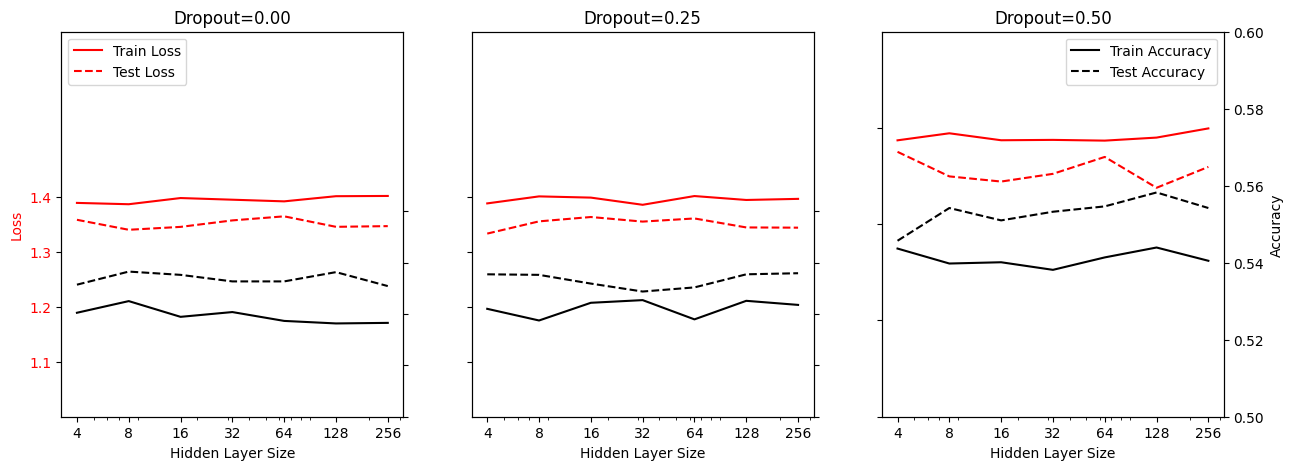

In [25]:
if False:
    sizes = [4, 256]
    dropout = [0, 0.25, 0.5]
    # expo = [True, False]
    run_size = 3
    df_s, df_d, df_e, df_std_h, df_std_a = [[] for _ in range(run_size)], [[] for _ in range(run_size)], [[] for _ in range(run_size)], [[] for _ in range(run_size)], [[] for _ in range(run_size)]
    df_train_loss, df_test_loss, df_train_acc, df_test_acc = [[] for _ in range(run_size)], [[] for _ in range(run_size)], [[] for _ in range(run_size)], [[] for _ in range(run_size)]
    # for s, d, e in itertools.product(sizes, dropout, expo):
    for i in range(run_size):
        for s, d in itertools.product(sizes, dropout):
            model = None
            df_s[i].append(s)
            df_d[i].append(d)
            # df_e.append(e)
            model = Sequential()
            model.add(InputLayer(input_shape=(14, 1)))
            model.add(Dropout(0.25))
            model.add(LSTM(26))#, input_shape=(14, 1)))
            model.add(Dense(2, activation="linear"))
            model.add(ExponentialLayer(2))
            # if e:
            #     model.add(ExponentialLayer(2))

            # compile the keras model
            model.compile(loss=my_loss, optimizer="adam", metrics=my_acc)

            history = model.fit(X, y, epochs=50, batch_size=10)

            eval_loss, eval_acc = model.evaluate(X_test, y_test)

            df_train_loss[i].append(history.history["loss"][-1])
            df_train_acc[i].append(history.history["my_acc"][-1])
            df_test_loss[i].append(eval_loss)
            df_test_acc[i].append(eval_acc)
            if False: # std eval
                preds = []
                for x in range(1000):
                    preds.append(model(X_test, training=True))

                preds = np.stack(preds)
                # # preds = preds.astype(int)

                predictions_home = np.swapaxes(preds, 0, 1)[:, :, 0]
                predictions_away = np.swapaxes(preds, 0, 1)[:, :, 1]

                home_std = np.std(predictions_home, axis=1)
                away_std = np.std(predictions_away, axis=1)

                df_std_h[i].append(home_std.mean())
                df_std_a[i].append(away_std.mean())
    auswertung = pd.DataFrame({"dropout": np.mean(df_d, axis=0), "param_size": np.mean(df_s, axis=0), 
                               "train_loss": np.mean(df_train_loss, axis=0), "train_acc": np.mean(df_train_acc, axis=0), 
                               "test_loss": np.mean(df_test_loss, axis=0), "test_acc": np.mean(df_test_acc, axis=0)})
if False: # plot dropout std analysis
    auswertung = pd.read_csv("mlp_dropout_std.csv", sep=";")
    # plot auswertung
    fig, ax = plt.subplots(1)
    ax.plot(auswertung[auswertung["param_size"] == 4]["dropout"], auswertung[auswertung["param_size"] == 4]["std"], color="r", label="4")
    ax.plot(auswertung[auswertung["param_size"] == 8]["dropout"], auswertung[auswertung["param_size"] == 8]["std"], color="b", label="8")
    ax.plot(auswertung[auswertung["param_size"] == 16]["dropout"], auswertung[auswertung["param_size"] == 16]["std"], color="g", label="16")
    ax.plot(auswertung[auswertung["param_size"] == 32]["dropout"], auswertung[auswertung["param_size"] == 32]["std"], color="y", label="32")
    ax.plot(auswertung[auswertung["param_size"] == 128]["dropout"], auswertung[auswertung["param_size"] == 128]["std"], color="k", label="128")
    ax.set_ylabel("Std of goals predicted")
    ax.set_xlabel("Dropout rate")
    ax.legend(loc=4, title="Hidden layer size")
if True: # plot mlp size analysis
    auswertung = pd.read_csv("lstm_size.csv", sep=";")
    auswertung = auswertung.sort_values("param_size")
    fig, axs = plt.subplots(1,3, figsize=(15, 5))
    axs[0].plot(np.array(auswertung[auswertung["dropout"] == 0][["param_size"]]).astype(int), auswertung[auswertung["dropout"] == 0][["train_loss"]], "r-", label='Train Loss')
    axs[0].plot(np.array(auswertung[auswertung["dropout"] == 0][["param_size"]]).astype(int), auswertung[auswertung["dropout"] == 0][["test_loss"]], "r--", label="Test Loss")
    ax0_twin = axs[0].twinx()
    ax0_twin.plot(np.array(auswertung[auswertung["dropout"] == 0][["param_size"]]).astype(int), auswertung[auswertung["dropout"] == 0][["train_acc"]], "k-", label='Train Accuracy')
    ax0_twin.plot(np.array(auswertung[auswertung["dropout"] == 0][["param_size"]]).astype(int), auswertung[auswertung["dropout"] == 0][["test_acc"]], "k--", label="Test Accuracy")
    axs[0].set_xticks(auswertung[auswertung["dropout"] == 0][["param_size"]].values)
    axs[0].set_ylim([1,1.7])
    ax0_twin.set_ylim([0.5,0.65])
    axs[0].legend(loc=2)
    # ax0_twin.legend(loc=1)
    axs[1].plot(np.array(auswertung[auswertung["dropout"] == 0.25][["param_size"]]).astype(int), auswertung[auswertung["dropout"] == 0.25][["train_loss"]], "r-", label='Train Loss')
    axs[1].plot(np.array(auswertung[auswertung["dropout"] == 0.25][["param_size"]]).astype(int), auswertung[auswertung["dropout"] == 0.25][["test_loss"]], "r--", label="Test Loss")
    ax1_twin = axs[1].twinx()
    ax1_twin.plot(np.array(auswertung[auswertung["dropout"] == 0.25][["param_size"]]).astype(int), auswertung[auswertung["dropout"] == 0.25][["train_acc"]], "k-", label='Train Accuracy')
    ax1_twin.plot(np.array(auswertung[auswertung["dropout"] == 0.25][["param_size"]]).astype(int), auswertung[auswertung["dropout"] == 0.25][["test_acc"]], "k--", label="Test Accuracy")
    axs[1].set_xticks(auswertung[auswertung["dropout"] == 0.25][["param_size"]].values)
    axs[1].set_ylim([1,1.7])
    ax1_twin.set_ylim([0.5,0.65])
    #axs[1].legend(loc=2)
    #ax1_twin.legend(loc=1)
    axs[2].plot(np.array(auswertung[auswertung["dropout"] == 0.5][["param_size"]]).astype(int), auswertung[auswertung["dropout"] == 0.5][["train_loss"]], "r-", label='Train Loss')
    axs[2].plot(np.array(auswertung[auswertung["dropout"] == 0.5][["param_size"]]).astype(int), auswertung[auswertung["dropout"] == 0.5][["test_loss"]], "r--", label="Test Loss")
    ax2_twin = axs[2].twinx()
    ax2_twin.plot(np.array(auswertung[auswertung["dropout"] == 0.5][["param_size"]]).astype(int), auswertung[auswertung["dropout"] == 0.5][["train_acc"]], "k-", label='Train Accuracy')
    ax2_twin.plot(np.array(auswertung[auswertung["dropout"] == 0.5][["param_size"]]).astype(int), auswertung[auswertung["dropout"] == 0.5][["test_acc"]], "k--", label="Test Accuracy")
    axs[2].set_xticks(auswertung[auswertung["dropout"] == 0.5][["param_size"]].values)
    axs[2].set_ylim([1.1,1.5])
    ax2_twin.set_ylim([0.5,0.6])
    # axs[2].legend(loc=2)
    ax2_twin.legend(loc=1)
    axs[0].set_xscale("log")
    axs[1].set_xscale("log")
    axs[2].set_xscale("log")
    axs[0].set_xticks([4, 8, 16, 32, 64, 128, 256], ["4", "8", "16", "32", "64", "128", "256"])
    axs[1].set_xticks([4, 8, 16, 32, 64, 128, 256], ["4", "8", "16", "32", "64", "128", "256"])
    axs[2].set_xticks([4, 8, 16, 32, 64, 128, 256], ["4", "8", "16", "32", "64", "128", "256"])
    axs[1].set_yticks(np.arange(1.1,1.5,0.1),[])
    ax1_twin.set_yticks(np.arange(0.5,0.6,0.02),[])
    ax0_twin.set_yticks(np.arange(0.5,0.6,0.02),[])
    axs[2].set_yticks(np.arange(1.1,1.5,0.1),[])
    axs[0].set_title("Dropout=0.00")
    axs[1].set_title("Dropout=0.25")
    axs[2].set_title("Dropout=0.50")
    axs[0].set_yticks(np.arange(1.1,1.5,0.1),np.around(np.arange(1.1,1.5,0.1),2).astype(str),color="r")
    axs[0].set_ylabel("Loss", color="r")
    ax2_twin.set_ylabel("Accuracy")
    axs[0].set_xlabel("Hidden Layer Size")
    axs[1].set_xlabel("Hidden Layer Size")
    axs[2].set_xlabel("Hidden Layer Size")

In [23]:
auswertung

,dropout,param_size,train_loss,train_acc,test_loss,test_acc
0,0.00,4.0,1.388768,0.540504,1.358047,0.551446
1,0.25,4.0,1.387857,0.542037,1.332966,0.555485
2,0.50,4.0,1.387167,0.543679,1.375202,0.545706
3,0.00,256.0,1.401398,0.536563,1.346537,0.550902
4,0.25,256.0,1.396097,0.543569,1.343741,0.555910
5,0.50,256.0,1.399542,0.540504,1.359547,0.554209
6,0.00,8.0,1.386352,0.545047,1.339890,0.556548
7,0.25,8.0,1.400613,0.537493,1.355189,0.555272
8,0.50,8.0,1.394482,0.539792,1.349695,0.554209
9,0.00,16.0,1.397602,0.538916,1.345161,0.555272


In [19]:
auswertung.to_csv("lstm_size.csv", sep=";", index = False)

In [33]:
eval_result = model.evaluate(X_test, y_test)

49/49 [==============================] - 0s 2ms/step - loss: 0.9996


In [35]:
eval_result

0.9996348023414612

In [34]:
preds = []
for x in range(1000):
    preds.append(model(X_test, training=True))

preds = np.stack(preds)
# preds = preds.astype(int)

In [21]:
predictions_home = np.swapaxes(preds, 0, 1)[:, :, 0]
predictions_away = np.swapaxes(preds, 0, 1)[:, :, 1]

In [22]:
home_std = np.std(predictions_home, axis=1)
away_std = np.std(predictions_away, axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3bb4fed6c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3bb4fedc60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3bb4fed3f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3bb4fee200>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3bb4fee4d0>],
 'means': []}

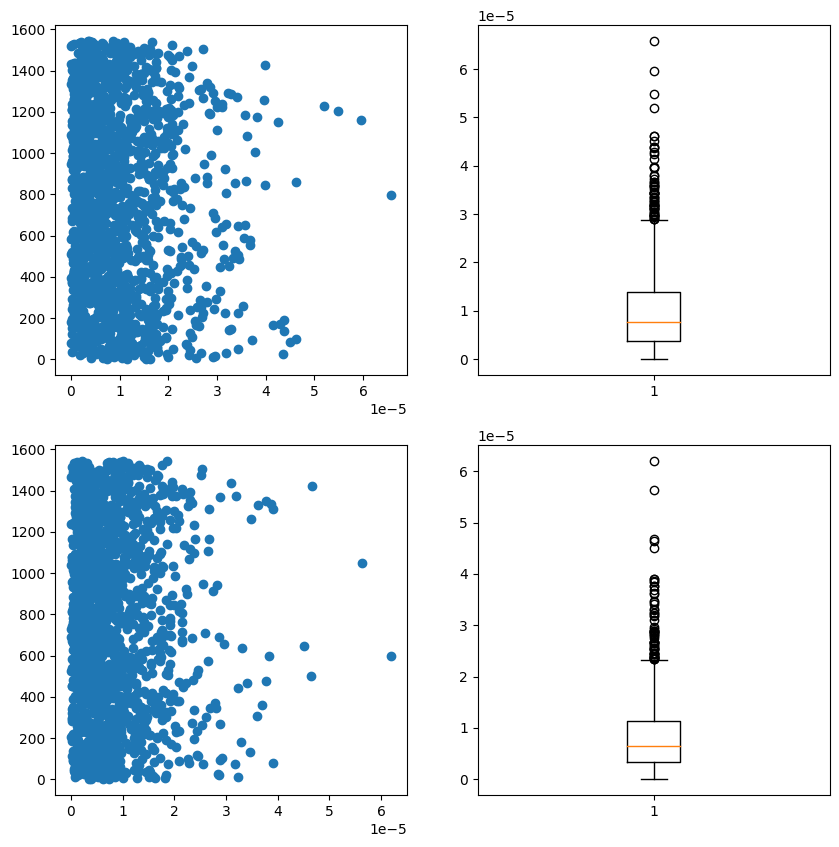

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 2)
fig.set_size_inches(10, 10)
ax1[0].scatter(home_std, np.arange(1545))
ax2[0].scatter(away_std, np.arange(1545))
ax1[1].boxplot(home_std)
ax2[1].boxplot(away_std)

In [39]:
# eval pipeline:
import itertools
sizes = [16, 32, 64, 128]
dropout = [0, 0.2, 0.5, 0.8]
# ropout_enabled = [True, False]

df_s, df_d, df_trainabe, df_training_loss, df_test_loss, accuracy = [], [], [], [], [], []

for s, d in itertools.product(sizes, dropout):
    df_s.append(s)
    df_d.append(d)
    # df_e.append(e)
    model = Sequential()
    model.add(LSTM(s, input_shape=(13, 1)))
    model.add(Dropout(d))
    # model.add(Dense(512, activation="relu"))
    # model.add(Dropout(0.25))
    # model.add(Dense(256, activation="relu"))
    # model.add(Dropout(0.25))
    model.add(Dense(2, activation="linear"))
    model.add(ExponentialLayer(2))

    # compile the keras model
    model.compile(loss="mean_squared_error", optimizer="adam")
    # model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    df_trainabe.append(np.sum([K.count_params(w) for w in model.trainable_weights]))
    history = model.fit(X, y, epochs=100, batch_size=10)

    test_data = pd.read_csv(
       "../data_acquisition/data_0.3/data_game_values_test_odds.csv", sep=";"
    ).dropna()

    features = np.swapaxes(
        np.array(
            [
                test_data["home_xG"] - xg_mean,
                test_data["away_xg_against"] - xg_against_mean,
                test_data["away_xG"] - xg_mean,
                test_data["home_xg_against"] - xg_against_mean,
                test_data["home_xT_all"] - xt_mean,
                test_data["away_xT_all"] - xt_mean,
                test_data["home_xt_all_against"] - xt_against_mean,
                test_data["away_xt_all_against"] - xt_against_mean,
            ]
        ),
        0,
        1,
    )
    # features_a = np.swapaxes(np.array([train_data["away_xG"], train_data["away_xT_only_pos"], train_data["home_xg_against"], train_data["home_xt_only_pos_against"]]), 0, 1)

    gi = np.swapaxes(np.array([test_data["home_gi"], test_data["away_gi"]]), 0, 1)
    # gi_a = np.swapaxes(np.array([train_data["away_gi"]]), 0, 1)

    form = np.swapaxes(
        np.array(
            [
                (test_data["ha_form_home_for"] / 5) - form_for_mean,
                (test_data["ha_form_home_against"] / 5) - form_against_mean,
                (test_data["ha_form_away_for"] / 5) - form_for_mean,
                (test_data["ha_form_away_against"] / 5) - form_against_mean,
            ]
        ),
        0,
        1,
    )

    goals = np.swapaxes(np.array([test_data["home_score"], test_data["away_score"]]), 0, 1)

    elo = np.swapaxes(
        np.array([(test_data["elo_home"] / 1000) - (test_data["elo_away"] / 1000)]), 0, 1
    )

    X_test = np.concatenate([features, form, elo], axis=1)
    y_test = np.array(goals)

    eval_result = model.evaluate(X_test, y_test)

    preds = []
    for x in range(1000):
        preds.append(model(X_test, training=True))

    preds = np.stack(preds)
    # preds = preds.astype(int)

    predictions_home = np.swapaxes(preds, 0, 1)[:, :, 0]
    predictions_away = np.swapaxes(preds, 0, 1)[:, :, 1]

    home_std = np.std(predictions_home, axis=1)
    away_std = np.std(predictions_away, axis=1)

    df_training_loss.append(history.history["loss"][-1])
    df_test_loss.append(eval_result)

    act_res = []
    for h, a in y_test:
        act_res.append(f"{str(int(h))}:{str(int(a))}")

    predictions_home = np.swapaxes(preds, 0, 1)[:, :, 0]
    predictions_away = np.swapaxes(preds, 0, 1)[:, :, 1]

    game_quotes = []
    most_goals = {"home": [], "away": []}
    for game_idx in range(len(predictions_home)):
        game_df = pd.DataFrame(
            {"home": predictions_home[game_idx], "away": predictions_away[game_idx]}
        )
        # home_hist, bin_edges = np.histogram(predictions_home[game_idx], [0,1,2,3,4,5,6])
        # away_hist, bin_edges = np.histogram(predictions_away[game_idx], [0,1,2,3,4,5,6])
        # home, draw, away = 0, 0, 0
        # for i in range(len(home_hist)):
        #     for j in range(len(away_hist)):
        #         if j < i:
        #             home += (home_hist[i]/1000) * (away_hist[j]/1000)
        #         elif j == i:
        #             draw += (home_hist[i]/1000) * (away_hist[j]/1000)
        #         elif j > i:
        #             away += (home_hist[i]/1000) * (away_hist[j]/1000)
        game_df["diff"] = game_df["home"] - game_df["away"]
        home = game_df.loc[game_df["diff"] >= 1].shape[0] / 1000
        draw = (
            game_df.loc[(game_df["diff"] < 1) & (game_df["diff"] > -1)].shape[0] / 1000
        )
        away = game_df.loc[game_df["diff"] <= -1].shape[0] / 1000

        game_quotes.append(f"{round(home, 3)}-{round(draw, 3)}-{round(away, 3)}")
        # most_goals["home"].append(f"h: {np.argmax(home_hist)} - {round(np.max(home_hist)/10)}%")
        # most_goals["away"].append(f"a: {np.argmax(away_hist)} - {round(np.max(away_hist)/10)}%")

    # df_res = pd.DataFrame({"actual": act_res, "predicted": game_quotes, "prob goals home" : most_goals['home'], "prob goals away" : most_goals['away']})
    df_res = pd.DataFrame(
        {"actual": act_res, "predicted": game_quotes}
    )  # , "prob goals home" : most_goals['home'], "prob goals away" : most_goals['away']})
    df_cross = pd.DataFrame(
        {
            "actual": [
                0
                if int(df_res.iloc[i]["actual"].split(":")[0])
                > int(df_res.iloc[i]["actual"].split(":")[1])
                else 1
                if int(df_res.iloc[i]["actual"].split(":")[0])
                == int(df_res.iloc[i]["actual"].split(":")[1])
                else 2
                for i in range(df_res.shape[0])
            ],
            "pred": [
                np.argmax([float(y) for y in df_res.iloc[i]["predicted"].split("-")])
                for i in range(df_res.shape[0])
            ],
            "pred_val": [
                np.max([float(y) for y in df_res.iloc[i]["predicted"].split("-")])
                for i in range(df_res.shape[0])
            ],
            "bookie": [
                np.argmax(
                    [
                        test_data.iloc[i].bookie_home,
                        test_data.iloc[i].bookie_draw,
                        test_data.iloc[i].bookie_away,
                    ]
                )
                for i in range(test_data.shape[0])
            ],
            "bookie_val": [
                np.max(
                    [
                        test_data.iloc[i].bookie_home,
                        test_data.iloc[i].bookie_draw,
                        test_data.iloc[i].bookie_away,
                    ]
                )
                for i in range(test_data.shape[0])
            ],
        }
    )
    print("Verteilung:")
    print(
        f"Anzahl Predicted Home: {df_cross[df_cross['pred'] == 0].shape[0]} ({round(df_cross[df_cross['pred'] == 0].shape[0] / df_cross.shape[0] * 100, 2)}%)",
        end="",
    )
    print(
        f" | Verteilung Tatsächlich Home: {round(df_cross[df_cross['actual'] == 0].shape[0] / df_cross.shape[0] * 100, 2)}%"
    )
    print(
        f"Anzahl Predicted Draw: {df_cross[df_cross['pred'] == 1].shape[0]} ({round(df_cross[df_cross['pred'] == 1].shape[0] / df_cross.shape[0] * 100, 2)}%)",
        end="",
    )
    print(
        f" | Verteilung Tatsächlich Draw: {round(df_cross[df_cross['actual'] == 1].shape[0] / df_cross.shape[0] * 100, 2)}%"
    )
    print(
        f"Anzahl Predicted Away: {df_cross[df_cross['pred'] == 2].shape[0]} ({round(df_cross[df_cross['pred'] == 2].shape[0] / df_cross.shape[0] * 100, 2)}%)",
        end="",
    )
    print(
        f" | Verteilung Tatsächlich Away: {round(df_cross[df_cross['actual'] == 2].shape[0] / df_cross.shape[0] * 100, 2)}%"
    )
    print(
        "---------------------------------------------------------------------------------"
    )
    print(
        "---------------------------------------------------------------------------------"
    )
    right, wrong, home_right, draw_right, away_right = 0, 0, 0, 0, 0
    home_pred = {"act_away": 0, "act_draw": 0}
    draw_pred = {"act_away": 0, "act_home": 0}
    away_pred = {"act_home": 0, "act_draw": 0}
    for x in range(df_cross.shape[0]):
        if df_cross.iloc[x]["actual"] != df_cross.iloc[x]["pred"]:
            if df_cross.iloc[x]["pred"] == 0:
                if df_cross.iloc[x]["actual"] == 1:
                    home_pred["act_draw"] += 1
                else:
                    home_pred["act_away"] += 1
            elif df_cross.iloc[x]["pred"] == 1:
                if df_cross.iloc[x]["actual"] == 0:
                    draw_pred["act_home"] += 1
                else:
                    draw_pred["act_away"] += 1
            else:
                if df_cross.iloc[x]["actual"] == 0:
                    away_pred["act_home"] += 1
                else:
                    away_pred["act_draw"] += 1
            wrong += 1
        else:
            if df_cross.iloc[x]["actual"] == 0:
                home_right += 1
            elif df_cross.iloc[x]["actual"] == 1:
                draw_right += 1
            else:
                away_right += 1
            right += 1

    home_wrong = home_pred["act_away"] + home_pred["act_draw"]
    draw_wrong = draw_pred["act_away"] + draw_pred["act_home"]
    away_wrong = away_pred["act_home"] + away_pred["act_draw"]
    print("Prediction:")
    print(
        f"Anzahl Korrekt: {right} ({round(right / df_cross.shape[0] * 100,2)}%), Anzahl Falsch: {wrong} ({round(wrong / df_cross.shape[0] * 100, 2)}%)"
    )
    print(
        "---------------------------------------------------------------------------------"
    )
    print(
        f"Anzahl Home Korrekt: {home_right} ({round(home_right / df_cross[df_cross['actual'] == 0].shape[0] * 100, 2)}%), Anzahl Home Falsch: {home_wrong}"
    )
    print(f"Home Pred. aber Draw --> {home_pred['act_draw']}")
    print(f"Home Pred. aber Away --> {home_pred['act_away']}")
    print(
        f"Anzahl Draw Korrekt: {draw_right} ({round(draw_right / df_cross[df_cross['actual'] == 1].shape[0] * 100, 2)}%), Anzahl Draw Falsch: {draw_wrong}"
    )
    print(f"Draw Pred. aber Home --> {draw_pred['act_home']}")
    print(f"Draw Pred. aber Away --> {draw_pred['act_away']}")
    print(
        f"Anzahl Away Korrekt: {away_right} ({round(away_right / df_cross[df_cross['actual'] == 2].shape[0] * 100, 2)}%), Anzahl Away Falsch: {away_wrong}"
    )
    print(f"Away Pred. aber Home --> {away_pred['act_home']}")
    print(f"Away Pred. aber Draw --> {away_pred['act_draw']}")

    accuracy.append(right / df_cross.shape[0])

Epoch 1/100
609/609 [==============================] - 5s 6ms/step - loss: 1.3972
Epoch 2/100
609/609 [==============================] - 3s 6ms/step - loss: 1.1926
Epoch 3/100
609/609 [==============================] - 4s 6ms/step - loss: 1.0313
Epoch 4/100
609/609 [==============================] - 5s 9ms/step - loss: 0.9985
Epoch 5/100
609/609 [==============================] - 5s 9ms/step - loss: 0.9893
Epoch 6/100
609/609 [==============================] - 6s 10ms/step - loss: 0.9844
Epoch 7/100
609/609 [==============================] - 8s 13ms/step - loss: 0.9789
Epoch 8/100
609/609 [==============================] - 7s 11ms/step - loss: 0.9784
Epoch 9/100
609/609 [==============================] - 7s 11ms/step - loss: 0.9767
Epoch 10/100
609/609 [==============================] - 8s 13ms/step - loss: 0.9726
Epoch 11/100
609/609 [==============================] - 9s 15ms/step - loss: 0.9702
Epoch 12/100
609/609 [==============================] - 9s 15ms/step - loss: 0.9697
Epoch 

In [40]:
auswertung = pd.DataFrame({"layer_size": df_s, "dropout": df_d, "prameters": df_trainabe, "train_loss": df_training_loss, "test_loss": df_test_loss, "accuracy": accuracy})

In [42]:
auswertung.to_csv("lstm_analysis.csv", sep=";", index=False)

In [24]:
act_res = []
for h, a in y_test:
    act_res.append(f"{str(int(h))}:{str(int(a))}")

predictions_home = np.swapaxes(preds, 0, 1)[:, :, 0]
predictions_away = np.swapaxes(preds, 0, 1)[:, :, 1]

game_quotes = []
most_goals = {"home": [], "away": []}
for game_idx in range(len(predictions_home)):
    game_df = pd.DataFrame(
        {"home": predictions_home[game_idx], "away": predictions_away[game_idx]}
    )
    # home_hist, bin_edges = np.histogram(predictions_home[game_idx], [0,1,2,3,4,5,6])
    # away_hist, bin_edges = np.histogram(predictions_away[game_idx], [0,1,2,3,4,5,6])
    # home, draw, away = 0, 0, 0
    # for i in range(len(home_hist)):
    #     for j in range(len(away_hist)):
    #         if j < i:
    #             home += (home_hist[i]/1000) * (away_hist[j]/1000)
    #         elif j == i:
    #             draw += (home_hist[i]/1000) * (away_hist[j]/1000)
    #         elif j > i:
    #             away += (home_hist[i]/1000) * (away_hist[j]/1000)
    game_df["diff"] = game_df["home"] - game_df["away"]
    home = game_df.loc[game_df["diff"] >= 1].shape[0] / 1000
    draw = (
        game_df.loc[(game_df["diff"] < 1) & (game_df["diff"] > -1)].shape[0] / 1000
    )
    away = game_df.loc[game_df["diff"] <= -1].shape[0] / 1000

    game_quotes.append(f"{round(home, 3)}-{round(draw, 3)}-{round(away, 3)}")
    # most_goals["home"].append(f"h: {np.argmax(home_hist)} - {round(np.max(home_hist)/10)}%")
    # most_goals["away"].append(f"a: {np.argmax(away_hist)} - {round(np.max(away_hist)/10)}%")

# df_res = pd.DataFrame({"actual": act_res, "predicted": game_quotes, "prob goals home" : most_goals['home'], "prob goals away" : most_goals['away']})
df_res = pd.DataFrame(
    {"actual": act_res, "predicted": game_quotes}
)  # , "prob goals home" : most_goals['home'], "prob goals away" : most_goals['away']})
df_cross = pd.DataFrame(
    {
        "actual": [
            0
            if int(df_res.iloc[i]["actual"].split(":")[0])
            > int(df_res.iloc[i]["actual"].split(":")[1])
            else 1
            if int(df_res.iloc[i]["actual"].split(":")[0])
            == int(df_res.iloc[i]["actual"].split(":")[1])
            else 2
            for i in range(df_res.shape[0])
        ],
        "pred": [
            np.argmax([float(y) for y in df_res.iloc[i]["predicted"].split("-")])
            for i in range(df_res.shape[0])
        ],
        "pred_val": [
            np.max([float(y) for y in df_res.iloc[i]["predicted"].split("-")])
            for i in range(df_res.shape[0])
        ],
        "bookie": [
            np.argmax(
                [
                    test_data.iloc[i].bookie_home,
                    test_data.iloc[i].bookie_draw,
                    test_data.iloc[i].bookie_away,
                ]
            )
            for i in range(test_data.shape[0])
        ],
        "bookie_val": [
            np.max(
                [
                    test_data.iloc[i].bookie_home,
                    test_data.iloc[i].bookie_draw,
                    test_data.iloc[i].bookie_away,
                ]
            )
            for i in range(test_data.shape[0])
        ],
    }
)


In [25]:
df_res.head(20)

,actual,predicted
0,1:1,0.0-1.0-0.0
1,1:0,0.0-1.0-0.0
2,2:0,1.0-0.0-0.0
3,2:1,1.0-0.0-0.0
4,0:1,0.0-1.0-0.0
5,2:1,0.0-1.0-0.0
6,1:1,0.0-0.0-1.0
7,2:2,1.0-0.0-0.0
8,1:2,0.0-0.0-1.0
9,2:1,0.0-0.0-1.0


In [26]:
print("Verteilung:")
print(
    f"Anzahl Predicted Home: {df_cross[df_cross['pred'] == 0].shape[0]} ({round(df_cross[df_cross['pred'] == 0].shape[0] / df_cross.shape[0] * 100, 2)}%)",
    end="",
)
print(
    f" | Verteilung Tatsächlich Home: {round(df_cross[df_cross['actual'] == 0].shape[0] / df_cross.shape[0] * 100, 2)}%"
)
print(
    f"Anzahl Predicted Draw: {df_cross[df_cross['pred'] == 1].shape[0]} ({round(df_cross[df_cross['pred'] == 1].shape[0] / df_cross.shape[0] * 100, 2)}%)",
    end="",
)
print(
    f" | Verteilung Tatsächlich Draw: {round(df_cross[df_cross['actual'] == 1].shape[0] / df_cross.shape[0] * 100, 2)}%"
)
print(
    f"Anzahl Predicted Away: {df_cross[df_cross['pred'] == 2].shape[0]} ({round(df_cross[df_cross['pred'] == 2].shape[0] / df_cross.shape[0] * 100, 2)}%)",
    end="",
)
print(
    f" | Verteilung Tatsächlich Away: {round(df_cross[df_cross['actual'] == 2].shape[0] / df_cross.shape[0] * 100, 2)}%"
)
print(
    "---------------------------------------------------------------------------------"
)
print(
    "---------------------------------------------------------------------------------"
)
right, wrong, home_right, draw_right, away_right = 0, 0, 0, 0, 0
home_pred = {"act_away": 0, "act_draw": 0}
draw_pred = {"act_away": 0, "act_home": 0}
away_pred = {"act_home": 0, "act_draw": 0}
for x in range(df_cross.shape[0]):
    if df_cross.iloc[x]["actual"] != df_cross.iloc[x]["pred"]:
        if df_cross.iloc[x]["pred"] == 0:
            if df_cross.iloc[x]["actual"] == 1:
                home_pred["act_draw"] += 1
            else:
                home_pred["act_away"] += 1
        elif df_cross.iloc[x]["pred"] == 1:
            if df_cross.iloc[x]["actual"] == 0:
                draw_pred["act_home"] += 1
            else:
                draw_pred["act_away"] += 1
        else:
            if df_cross.iloc[x]["actual"] == 0:
                away_pred["act_home"] += 1
            else:
                away_pred["act_draw"] += 1
        wrong += 1
    else:
        if df_cross.iloc[x]["actual"] == 0:
            home_right += 1
        elif df_cross.iloc[x]["actual"] == 1:
            draw_right += 1
        else:
            away_right += 1
        right += 1

home_wrong = home_pred["act_away"] + home_pred["act_draw"]
draw_wrong = draw_pred["act_away"] + draw_pred["act_home"]
away_wrong = away_pred["act_home"] + away_pred["act_draw"]
print("Prediction:")
print(
    f"Anzahl Korrekt: {right} ({round(right / df_cross.shape[0] * 100,2)}%), Anzahl Falsch: {wrong} ({round(wrong / df_cross.shape[0] * 100, 2)}%)"
)
print(
    "---------------------------------------------------------------------------------"
)
print(
    f"Anzahl Home Korrekt: {home_right} ({round(home_right / df_cross[df_cross['actual'] == 0].shape[0] * 100, 2)}%), Anzahl Home Falsch: {home_wrong}"
)
print(f"Home Pred. aber Draw --> {home_pred['act_draw']}")
print(f"Home Pred. aber Away --> {home_pred['act_away']}")
print(
    f"Anzahl Draw Korrekt: {draw_right} ({round(draw_right / df_cross[df_cross['actual'] == 1].shape[0] * 100, 2)}%), Anzahl Draw Falsch: {draw_wrong}"
)
print(f"Draw Pred. aber Home --> {draw_pred['act_home']}")
print(f"Draw Pred. aber Away --> {draw_pred['act_away']}")
print(
    f"Anzahl Away Korrekt: {away_right} ({round(away_right / df_cross[df_cross['actual'] == 2].shape[0] * 100, 2)}%), Anzahl Away Falsch: {away_wrong}"
)
print(f"Away Pred. aber Home --> {away_pred['act_home']}")
print(f"Away Pred. aber Draw --> {away_pred['act_draw']}")

Verteilung:
Anzahl Predicted Home: 392 (25.37%) | Verteilung Tatsächlich Home: 42.78%
Anzahl Predicted Draw: 954 (61.75%) | Verteilung Tatsächlich Draw: 25.5%
Anzahl Predicted Away: 199 (12.88%) | Verteilung Tatsächlich Away: 31.72%
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Prediction:
Anzahl Korrekt: 766 (49.58%), Anzahl Falsch: 779 (50.42%)
---------------------------------------------------------------------------------
Anzahl Home Korrekt: 301 (45.54%), Anzahl Home Falsch: 91
Home Pred. aber Draw --> 56
Home Pred. aber Away --> 35
Anzahl Draw Korrekt: 308 (78.17%), Anzahl Draw Falsch: 646
Draw Pred. aber Home --> 348
Draw Pred. aber Away --> 298
Anzahl Away Korrekt: 157 (32.04%), Anzahl Away Falsch: 42
Away Pred. aber Home --> 12
Away Pred. aber Draw --> 30


In [27]:
home_histograms, away_histograms = [], []
for game_idx in range(len(predictions_home)):
    home_hist, bin_edges = np.histogram(
        np.array(predictions_home[game_idx], dtype=int), [0, 1, 2, 3, 4, 5, 6]
    )
    away_hist, bin_edges = np.histogram(
        np.array(predictions_away[game_idx], dtype=int), [0, 1, 2, 3, 4, 5, 6]
    )
    home_histograms.append(home_hist)
    away_histograms.append(away_hist)

home_cum_hist = np.sum(home_histograms, axis=0)
away_cum_hist = np.sum(away_histograms, axis=0)

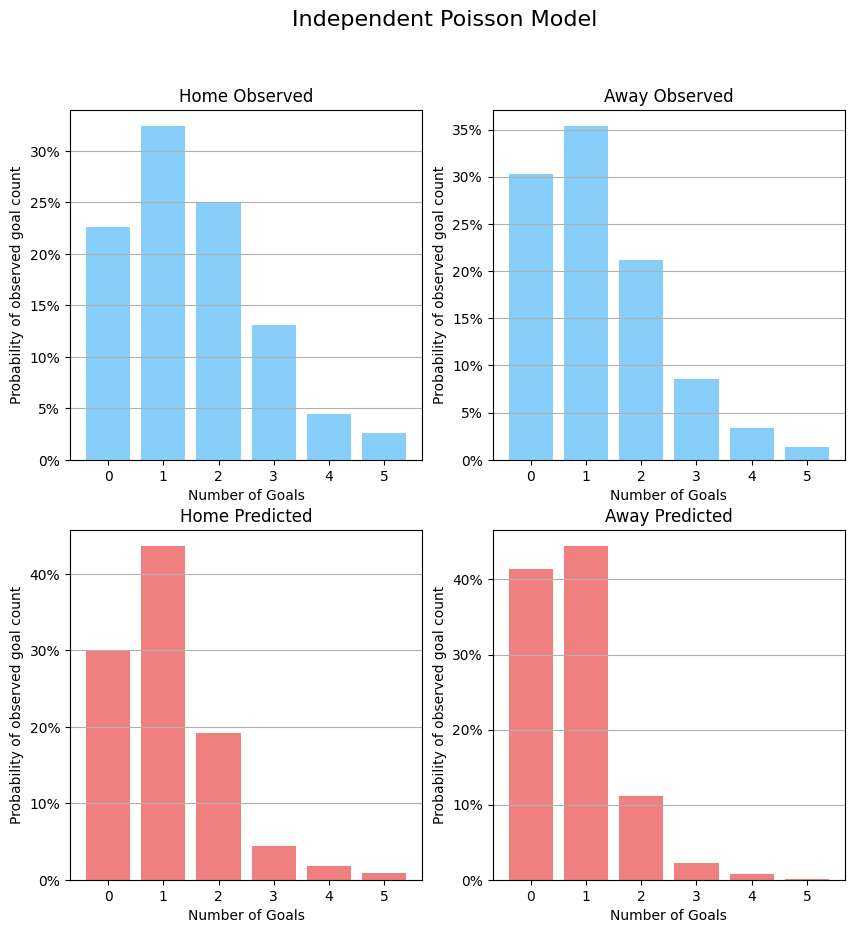

In [28]:
his_h, _ = np.histogram(train_data.home_score, [0, 1, 2, 3, 4, 5, 6])
his_a, _ = np.histogram(train_data.away_score, [0, 1, 2, 3, 4, 5, 6])
fig, (ax1, ax2) = plt.subplots(2, 2)
fig.set_size_inches(10, 10)
fig.suptitle("Independent Poisson Model", fontsize=16)
ax1[0].bar(np.arange(len(his_h)), his_h / np.sum(his_h), color="lightskyblue")
ax1[0].set_title("Home Observed")
ax1[0].set_xlabel("Number of Goals")
ax1[0].set_ylabel("Probability of observed goal count")
ax1[0].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x * 100), ",") + "%")
)
ax1[0].grid(axis="y")

ax2[0].bar(
    np.arange(len(home_cum_hist)),
    home_cum_hist / np.sum(home_cum_hist),
    color="lightcoral",
)
ax2[0].set_title("Home Predicted")
ax2[0].set_xlabel("Number of Goals")
ax2[0].set_ylabel("Probability of observed goal count")
ax2[0].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x * 100), ",") + "%")
)
ax2[0].grid(axis="y")

ax1[1].bar(np.arange(len(his_a)), his_a / np.sum(his_a), color="lightskyblue")
ax1[1].set_title("Away Observed")
ax1[1].set_xlabel("Number of Goals")
ax1[1].set_ylabel("Probability of observed goal count")
ax1[1].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x * 100), ",") + "%")
)
ax1[1].grid(axis="y")

ax2[1].bar(
    np.arange(len(away_cum_hist)),
    away_cum_hist / np.sum(away_cum_hist),
    color="lightcoral",
)
ax2[1].set_title("Away Predicted")
ax2[1].set_xlabel("Number of Goals")
ax2[1].set_ylabel("Probability of observed goal count")
ax2[1].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x * 100), ",") + "%")
)
ax2[1].grid(axis="y")

In [29]:
print("observed")
print(np.mean(train_data.home_score))
print(np.mean(train_data.away_score))

observed
1.5348569549490299
1.2387372574810918


In [30]:
print(np.sum([x * idx for idx, x in enumerate(home_cum_hist)]) / np.sum(home_cum_hist))
print(np.sum([x * idx for idx, x in enumerate(away_cum_hist)]) / np.sum(away_cum_hist))

1.0679611650485437
0.7669902912621359


Text(0.5, 1.0, 'Predicted')

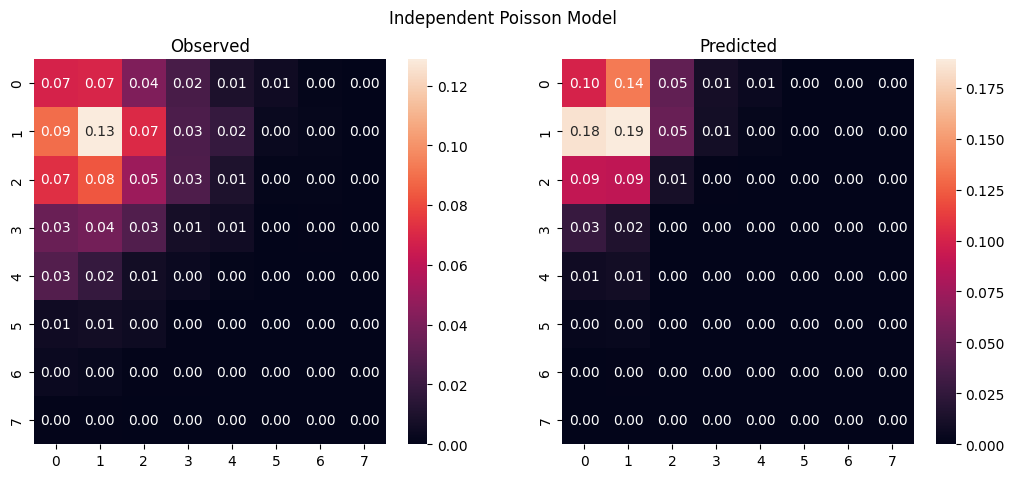

In [31]:
# actual
max_goals = int(np.max(y_test)) + 1
res_table_a = np.array([np.zeros(max_goals) for _ in range(max_goals)])
for h, a in y_test:
    res_table_a[int(h)][int(a)] += 1
res_table_a = res_table_a / test_data.shape[0]

# predicted
max_goals = int(np.max(y_test)) + 1
res_table_p = np.array([np.zeros(max_goals) for _ in range(max_goals)])

game_quotes = []
for game_idx in range(len(predictions_home)):
    home_hist, bin_edges = np.histogram(
        predictions_home[game_idx], [0, 1, 2, 3, 4, 5, 6, 7]
    )
    away_hist, bin_edges = np.histogram(
        predictions_away[game_idx], [0, 1, 2, 3, 4, 5, 6, 7]
    )
    if home_hist.shape[0] < max_goals:
        home_hist = np.append(home_hist, np.zeros(max_goals - home_hist.shape[0]))
    if away_hist.shape[0] < max_goals:
        away_hist = np.append(away_hist, np.zeros(max_goals - away_hist.shape[0]))

    home_hist = home_hist / 1000
    away_hist = away_hist / 1000
    probs = home_hist.reshape(home_hist.shape[0], 1) * away_hist
    probs = probs
    res_table_p += probs

res_table_p = res_table_p / test_data.shape[0]

# sb.heatmap(res_table_p, annot=True)

# top pred result:
max_goals = int(np.max(y_test)) + 1
res_table_pr = np.array([np.zeros(max_goals) for _ in range(max_goals)])

game_quotes = []
for game_idx in range(len(predictions_home)):
    home_hist, bin_edges = np.histogram(
        predictions_home[game_idx], [0, 1, 2, 3, 4, 5, 6, 7]
    )
    away_hist, bin_edges = np.histogram(
        predictions_away[game_idx], [0, 1, 2, 3, 4, 5, 6, 7]
    )
    res_table_pr[np.argmax(home_hist)][np.argmax(away_hist)] += 1
res_table_pr = res_table_pr / test_data.shape[0]
# sb.heatmap(res_table_pr, annot=True)

fig, axes = plt.subplots(1, 2, figsize=(12.5, 5))
fig.suptitle("Independent Poisson Model")
sb.heatmap(ax=axes[0], data=res_table_a, annot=True, fmt=".2f")
axes[0].set_title("Observed")
sb.heatmap(ax=axes[1], data=res_table_p, annot=True, fmt=".2f")
axes[1].set_title("Predicted")

In [32]:
print(np.tril(res_table_a).sum() - np.trace(res_table_a))
print(np.trace(res_table_a))
print(np.triu(res_table_a).sum() - np.trace(res_table_a))

0.4278317152103559
0.25501618122977343
0.31715210355987045


In [33]:
print(np.tril(res_table_p).sum() - np.trace(res_table_p))
print(np.trace(res_table_p))
print(np.triu(res_table_p).sum() - np.trace(res_table_p))

0.43430420711974105
0.30032362459546924
0.2653721682847896


In [34]:
# ece
data_length = df_cross.shape[0]

# acc_model = np.sum(df_cross['actual'] == df_cross['pred']) / data_length
# acc_bookie = np.sum(df_cross['bookie'] == df_cross['actual']) / data_length

# print("Accuracy Model: ", acc_model)
# print("Accuracy Bookie: ", acc_bookie)

# conf_model = np.sum(df_cross['pred_val']) / data_length
# conf_bookie = np.sum(df_cross['bookie_val']/100) / data_length

# print("Confidence Model: ", conf_model)
# print("Confidence Bookie: ", conf_bookie)

# ece_model = np.mean(np.absolute(acc_model - conf_model))
# ece_bookie = np.mean(np.absolute(acc_bookie - conf_bookie))

# print(f"Model ECE: {ece_model}")
# print(f"Bookie ECE: {ece_bookie}")
acc_home = (
    df_cross.loc[(df_cross["bookie"] == 0) & (df_cross["actual"] == 0)].shape[0]
) / df_cross.loc[df_cross["actual"] == 0].shape[0]
acc_draw = (
    df_cross.loc[(df_cross["bookie"] == 1) & (df_cross["actual"] == 1)].shape[0]
) / df_cross.loc[df_cross["actual"] == 1].shape[0]
acc_away = (
    df_cross.loc[(df_cross["bookie"] == 2) & (df_cross["actual"] == 2)].shape[0]
) / df_cross.loc[df_cross["actual"] == 2].shape[0]

conf_home = np.mean(df_cross.loc[(df_cross["bookie"] == 0)].bookie_val / 100)
conf_draw = np.mean(df_cross.loc[(df_cross["bookie"] == 1)].bookie_val / 100)
conf_away = np.mean(df_cross.loc[(df_cross["bookie"] == 2)].bookie_val / 100)
print(acc_home - conf_home)
print(acc_draw - conf_draw)
print(acc_away - conf_away)


acc_home = (
    df_cross.loc[(df_cross["pred"] == 0) & (df_cross["actual"] == 0)].shape[0]
) / df_cross.loc[df_cross["actual"] == 0].shape[0]
acc_draw = (
    df_cross.loc[(df_cross["pred"] == 1) & (df_cross["actual"] == 1)].shape[0]
) / df_cross.loc[df_cross["actual"] == 1].shape[0]
acc_away = (
    df_cross.loc[(df_cross["pred"] == 2) & (df_cross["actual"] == 2)].shape[0]
) / df_cross.loc[df_cross["actual"] == 2].shape[0]

conf_home = np.mean(df_cross.loc[(df_cross["pred"] == 0)].pred_val)
conf_draw = np.mean(df_cross.loc[(df_cross["pred"] == 1)].pred_val)
conf_away = np.mean(df_cross.loc[(df_cross["pred"] == 2)].pred_val)
print(acc_home - conf_home)
print(acc_draw - conf_draw)
print(acc_away - conf_away)

0.2601783491155203
nan
0.06721056586652263
-0.5446293494704992
-0.2182741116751269
-0.6795918367346938


In [35]:
bet_threshold = 10
bets, bets_won, bets_lost = 0, 0, 0
risk, money = 10, 0
for idx, x in df_res.iterrows():
    res = x.actual.split(":")
    result = 0 if res[0] > res[1] else 1 if res[0] == res[1] else 2
    pred = x.predicted.split("-")
    pred_h, pred_d, pred_a = pred[0], pred[1], pred[2]
    bookie_h, bookie_d, bookie_a = (
        test_data.iloc[idx].bookie_home,
        test_data.iloc[idx].bookie_draw,
        test_data.iloc[idx].bookie_away,
    )
    bookie_h_odd, bookie_d_odd, bookie_a_odd = (
        test_data.iloc[idx].bookie_home_odd,
        test_data.iloc[idx].bookie_draw_odd,
        test_data.iloc[idx].bookie_away_odd,
    )
    if (float(pred_h) * 100) - bookie_h > bet_threshold:
        bets += 1
        if result == 0:
            bets_won += 1
            money += risk * (bookie_h_odd) - risk
        else:
            bets_lost += 1
            money -= risk
    if (float(pred_d) * 100) - bookie_d > bet_threshold:
        bets += 1
        if result == 1:
            bets_won += 1
            money += risk * (bookie_d_odd) - risk
        else:
            bets_lost += 1
            money -= risk
    if (float(pred_a) * 100) - bookie_a > bet_threshold:
        bets += 1
        if result == 2:
            bets_won += 1
            money += risk * (bookie_a_odd) - risk
        else:
            bets_lost += 1
            money -= risk

print(f"bets: {bets}")
print(f"won: {bets_won}")
print(f"lost: {bets_lost}")
print("money: ", money)

# bets: 1004
# won: 467
# lost: 537
# money:  6749.102471962487

bets: 1545
won: 766
lost: 779
money:  4412.500000000002
